# Project: Dog vs Cat Classification

In [36]:
from pathlib import Path
import os
import torch
from torch import nn

In [37]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [38]:
data_path = Path("data/")
train_path = data_path / "train"
test_path = data_path / "test"

train_path, test_path

(WindowsPath('data/train'), WindowsPath('data/test'))

In [39]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Cat, Shape: (240, 320, 3)')

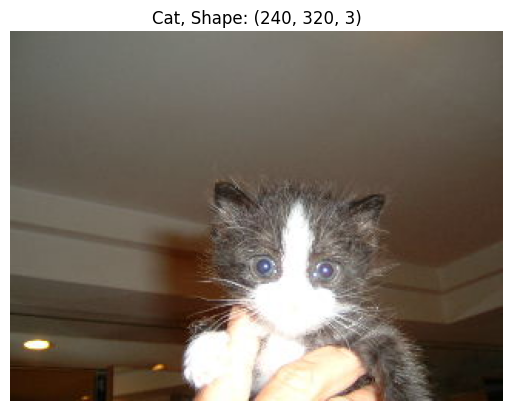

In [40]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
image_path_list = list(data_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
img_is_array = np.asarray(img)

plt.imshow(img)
plt.axis(False)
plt.title(f"{image_class}, Shape: {img_is_array.shape}")

In [41]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [42]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [43]:
transformed_image = data_transform(img)
transformed_image

tensor([[[0.4000, 0.4078, 0.4157,  ..., 0.3882, 0.3765, 0.3647],
         [0.4000, 0.4078, 0.4157,  ..., 0.3922, 0.3804, 0.3686],
         [0.4000, 0.4078, 0.4196,  ..., 0.3922, 0.3843, 0.3725],
         ...,
         [0.0510, 0.0588, 0.0784,  ..., 0.2039, 0.2000, 0.1961],
         [0.0314, 0.0510, 0.1059,  ..., 0.1961, 0.1882, 0.1765],
         [0.0157, 0.0431, 0.1294,  ..., 0.1608, 0.1490, 0.1373]],

        [[0.3765, 0.3843, 0.3922,  ..., 0.4000, 0.3882, 0.3765],
         [0.3765, 0.3843, 0.3922,  ..., 0.4039, 0.3922, 0.3804],
         [0.3725, 0.3804, 0.3922,  ..., 0.3961, 0.3882, 0.3765],
         ...,
         [0.0549, 0.0510, 0.0627,  ..., 0.0941, 0.0863, 0.0824],
         [0.0353, 0.0431, 0.0627,  ..., 0.0863, 0.0863, 0.0824],
         [0.0235, 0.0235, 0.0627,  ..., 0.0706, 0.0706, 0.0667]],

        [[0.3294, 0.3373, 0.3451,  ..., 0.3647, 0.3529, 0.3412],
         [0.3294, 0.3373, 0.3451,  ..., 0.3686, 0.3569, 0.3451],
         [0.3333, 0.3412, 0.3529,  ..., 0.3647, 0.3569, 0.

Text(0.5, 1.0, 'Cat, Shape: torch.Size([3, 64, 64])')

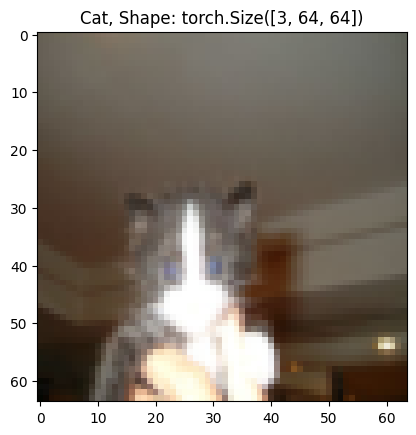

In [44]:
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title(f"{image_class}, Shape: {transformed_image.shape}")

# Loading data using 'ImageFolder'

In [45]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=test_data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 6602
     Root location: data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 1598
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [46]:
# Get class names as list
class_names = train_data.classes
class_names

['Cat', 'Dog']

In [47]:
# Get class names as dictionary 
class_dict = train_data.class_to_idx
class_dict

{'Cat': 0, 'Dog': 1}

In [48]:
len(train_data), len(test_data)

(6602, 1598)

# Turn loaded images into 'DataLoader'

In [49]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2721df749a0>,
 <torch.utils.data.dataloader.DataLoader at 0x2721df74cd0>)

In [50]:
img_custom, label_custom = next(iter(train_dataloader))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [51]:
class DogVsCat(nn.Module):
    def __init__(self, input_shape, hidden_layers, output_shape):
        super().__init__()

        self.conv_block_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            #nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers * 2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2),
            nn.ReLU(),
            #nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_block_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layers*2,
                      out_channels=hidden_layers*2*2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2*2),
            nn.ReLU(),
            #nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers*2*2,
                      out_channels=hidden_layers*2*2*2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2*2*2),
            nn.ReLU(),
           # nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classification = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*16*16*8,
                      #out_features=output_shape
                      out_features=128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, output_shape)
        )

    def forward(self, x):
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_1(x)
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_2(x)
        #print(f"Shape: {x.shape}")
        x = self.classification(x)
        #print(f"Shape: {x.shape}")
        return x
        

In [52]:
model_0 = DogVsCat(input_shape=3, hidden_layers=16, output_shape=1).to(device)
model_0

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): S

In [53]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [54]:
# Check the correct shape on dummy tensor
dummy_input = torch.randn(32, 3, 64, 64)
output = model_0(dummy_input.to(device))
output

tensor([[-0.4857],
        [-0.4700],
        [-0.7206],
        [ 0.0068],
        [-0.1052],
        [-0.3936],
        [-0.3099],
        [-0.3820],
        [ 0.0604],
        [-0.4236],
        [-0.7627],
        [-0.7233],
        [-0.0891],
        [-0.2529],
        [-0.2839],
        [-0.2940],
        [-0.1293],
        [-0.2800],
        [-0.4424],
        [-0.1579],
        [-0.2729],
        [-0.9537],
        [ 0.1425],
        [-0.6655],
        [-0.6353],
        [-0.4847],
        [ 0.6303],
        [-0.6856],
        [-0.6037],
        [-0.0665],
        [-0.2221],
        [-0.0817]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [55]:
from tqdm import tqdm
import time

In [56]:
epochs = 1

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    model_0.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        y = y.unsqueeze(dim=1).float()
        
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    train_loss /= len(train_dataloader)
    train_acc = (train_acc / len(train_dataloader)) * 100
    
    model_0.eval()
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model_0(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            test_acc += (test_pred_class==y).sum().item() / len(test_pred)
    
        test_loss /= len(test_dataloader)
        test_acc = (test_acc / len(test_dataloader)) * 100

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss}, Test Accuracy: {test_acc}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

100%|██████████| 1/1 [00:23<00:00, 23.97s/it]

Epoch: 0 | Train Loss: 0.8756, Train Accuracy: 58.92 | Test Loss: 0.6198121297359467, Test Accuracy: 66.575
Total time: 23.97200107574463


# Plot model_0 results

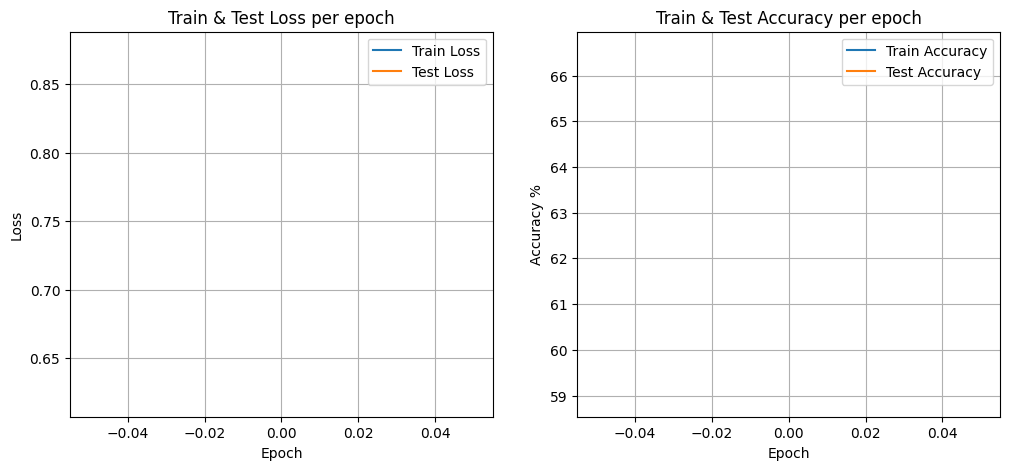

In [57]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()



In [58]:
print(len(results["train_loss"]), len(results["test_loss"]))
print(len(results["train_acc"]), len(results["test_acc"]))

1 1
1 1


In [59]:
# Build train and test function to make training easier
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               device=device):

    train_loss, correct_preds, total_samples = 0, 0, 0
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.unsqueeze(dim=1).float()
        
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        #train_acc += (y_pred_class==y).sum().item() / len(y_pred)
        correct_preds += (y_pred_class == y).sum().item()
        total_samples += y.size(0)

    train_loss /= len(dataloader)
    #train_acc = (train_acc / len(dataloader)) * 100
    train_acc = (correct_preds / total_samples) * 100
    
    return train_loss, train_acc

In [60]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

    test_loss, correct_preds, total_samples = 0, 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            #test_acc += (test_pred_class==y).sum().item() / len(test_pred)
            correct_preds += (test_pred_class == y).sum().item()
            total_samples += y.size(0)
    
    test_loss /= len(dataloader)
    #test_acc = (test_acc / len(dataloader)) * 100
    test_acc = (correct_preds / total_samples) * 100
    return test_loss, test_acc

# Augmentation data

In [61]:
train_data_transform_augmentation = transforms.Compose([
    #transforms.Resize(size=(64, 64)),
    transforms.RandomResizedCrop(size=(64, 64), scale=(0.9, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=25),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    #transforms.RandomAffine(degrees=15, translate=(1, 1)),
    #transforms.TrivialAugmentWide(num_magnitude_bins=31), # used to differentiate the data
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

test_data = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
train_data_transform_augmentation, test_data

(Compose(
     RandomResizedCrop(size=(64, 64), scale=(0.9, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
     RandomHorizontalFlip(p=0.5)
     RandomRotation(degrees=[-25.0, 25.0], interpolation=nearest, expand=False, fill=0)
     ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.05, 0.05))
     GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ))

In [62]:
train_data_augmentation = datasets.ImageFolder(root=train_path,
                                               transform=train_data_transform_augmentation)
test_data_augmentation = datasets.ImageFolder(root=test_path,
                                              transform=test_data)

train_data_augmentation, test_data_augmentation

(Dataset ImageFolder
     Number of datapoints: 6602
     Root location: data\train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(64, 64), scale=(0.9, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-25.0, 25.0], interpolation=nearest, expand=False, fill=0)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.05, 0.05))
                GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ),
 Dataset ImageFolder
     Number of datapoints: 1598
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5

In [63]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader_augmentation = DataLoader(dataset=train_data_augmentation,
                                           batch_size=BATCH_SIZE,
                                           num_workers=NUM_WORKERS,
                                           shuffle=True)

test_dataloader_augmentation = DataLoader(dataset=test_data_augmentation,
                                          batch_size=BATCH_SIZE,
                                          num_workers=NUM_WORKERS,
                                          shuffle=False)

train_dataloader_augmentation, test_dataloader_augmentation

(<torch.utils.data.dataloader.DataLoader at 0x2721e335a30>,
 <torch.utils.data.dataloader.DataLoader at 0x2721e335fd0>)

In [64]:
len(class_names)

2

In [65]:
model_1 = DogVsCat(input_shape=3, hidden_layers=8, output_shape=1).to(device)
model_1

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequen

In [66]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)
                             #lr=0.00025)
#optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01, momentum=0.9)
loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [67]:
# Train model_1 on augmentation data
epochs = 50

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    train_loss, train_acc = train_step(model=model_1,
               dataloader=train_dataloader_augmentation,
               loss_fn=loss_fn,
               optimizer=optimizer)

    test_loss, test_acc = test_step(model=model_1,
              dataloader=test_dataloader_augmentation,
              loss_fn=loss_fn)

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

  2%|▏         | 1/50 [00:34<28:00, 34.29s/it]

Epoch: 0 | Train Loss: 0.7599, Train Accuracy: 56.98 | Test Loss: 0.6468, Test Accuracy: 63.52


  4%|▍         | 2/50 [01:09<27:53, 34.86s/it]

Epoch: 1 | Train Loss: 0.6589, Train Accuracy: 59.62 | Test Loss: 0.6059, Test Accuracy: 68.21


  6%|▌         | 3/50 [01:46<28:11, 35.99s/it]

Epoch: 2 | Train Loss: 0.6418, Train Accuracy: 63.07 | Test Loss: 0.5762, Test Accuracy: 70.09


  8%|▊         | 4/50 [02:22<27:21, 35.68s/it]

Epoch: 3 | Train Loss: 0.6297, Train Accuracy: 63.63 | Test Loss: 0.5803, Test Accuracy: 70.21


 10%|█         | 5/50 [02:54<25:59, 34.66s/it]

Epoch: 4 | Train Loss: 0.6146, Train Accuracy: 64.90 | Test Loss: 0.5847, Test Accuracy: 69.15


 12%|█▏        | 6/50 [03:25<24:23, 33.27s/it]

Epoch: 5 | Train Loss: 0.6140, Train Accuracy: 65.81 | Test Loss: 0.5839, Test Accuracy: 69.34


 14%|█▍        | 7/50 [03:58<23:48, 33.22s/it]

Epoch: 6 | Train Loss: 0.6005, Train Accuracy: 65.92 | Test Loss: 0.5774, Test Accuracy: 69.21


 16%|█▌        | 8/50 [04:33<23:36, 33.72s/it]

Epoch: 7 | Train Loss: 0.5934, Train Accuracy: 67.09 | Test Loss: 0.5601, Test Accuracy: 72.28


 18%|█▊        | 9/50 [05:06<22:57, 33.60s/it]

Epoch: 8 | Train Loss: 0.5875, Train Accuracy: 69.01 | Test Loss: 0.5729, Test Accuracy: 69.40


 20%|██        | 10/50 [05:43<23:00, 34.52s/it]

Epoch: 9 | Train Loss: 0.5837, Train Accuracy: 68.22 | Test Loss: 0.5526, Test Accuracy: 71.96


 22%|██▏       | 11/50 [06:19<22:41, 34.92s/it]

Epoch: 10 | Train Loss: 0.5738, Train Accuracy: 69.58 | Test Loss: 0.5990, Test Accuracy: 65.02


 24%|██▍       | 12/50 [06:50<21:24, 33.81s/it]

Epoch: 11 | Train Loss: 0.5759, Train Accuracy: 69.12 | Test Loss: 0.5808, Test Accuracy: 69.09


 26%|██▌       | 13/50 [07:26<21:14, 34.43s/it]

Epoch: 12 | Train Loss: 0.5530, Train Accuracy: 70.57 | Test Loss: 0.5044, Test Accuracy: 75.34


 28%|██▊       | 14/50 [08:00<20:33, 34.25s/it]

Epoch: 13 | Train Loss: 0.5432, Train Accuracy: 71.45 | Test Loss: 0.5400, Test Accuracy: 74.03


 30%|███       | 15/50 [08:33<19:49, 33.98s/it]

Epoch: 14 | Train Loss: 0.5458, Train Accuracy: 71.28 | Test Loss: 0.4973, Test Accuracy: 77.85


 32%|███▏      | 16/50 [09:07<19:11, 33.88s/it]

Epoch: 15 | Train Loss: 0.5432, Train Accuracy: 71.55 | Test Loss: 0.5039, Test Accuracy: 76.10


 34%|███▍      | 17/50 [09:39<18:27, 33.57s/it]

Epoch: 16 | Train Loss: 0.5352, Train Accuracy: 72.05 | Test Loss: 0.4735, Test Accuracy: 78.79


 36%|███▌      | 18/50 [10:11<17:34, 32.96s/it]

Epoch: 17 | Train Loss: 0.5274, Train Accuracy: 72.52 | Test Loss: 0.5012, Test Accuracy: 76.41


 38%|███▊      | 19/50 [10:41<16:34, 32.06s/it]

Epoch: 18 | Train Loss: 0.5283, Train Accuracy: 72.69 | Test Loss: 0.4684, Test Accuracy: 78.66


 40%|████      | 20/50 [11:11<15:46, 31.57s/it]

Epoch: 19 | Train Loss: 0.5097, Train Accuracy: 73.90 | Test Loss: 0.4801, Test Accuracy: 78.04


 42%|████▏     | 21/50 [11:48<15:55, 32.95s/it]

Epoch: 20 | Train Loss: 0.5130, Train Accuracy: 73.98 | Test Loss: 0.4799, Test Accuracy: 77.10


 44%|████▍     | 22/50 [12:23<15:44, 33.73s/it]

Epoch: 21 | Train Loss: 0.5075, Train Accuracy: 74.13 | Test Loss: 0.4821, Test Accuracy: 77.78


 46%|████▌     | 23/50 [12:59<15:25, 34.27s/it]

Epoch: 22 | Train Loss: 0.5060, Train Accuracy: 73.34 | Test Loss: 0.4504, Test Accuracy: 80.85


 48%|████▊     | 24/50 [13:32<14:44, 34.01s/it]

Epoch: 23 | Train Loss: 0.5047, Train Accuracy: 74.30 | Test Loss: 0.4572, Test Accuracy: 79.66


 50%|█████     | 25/50 [14:06<14:09, 33.97s/it]

Epoch: 24 | Train Loss: 0.4966, Train Accuracy: 74.07 | Test Loss: 0.4726, Test Accuracy: 77.78


 52%|█████▏    | 26/50 [14:41<13:45, 34.39s/it]

Epoch: 25 | Train Loss: 0.4883, Train Accuracy: 75.64 | Test Loss: 0.4294, Test Accuracy: 81.54


 54%|█████▍    | 27/50 [15:13<12:50, 33.51s/it]

Epoch: 26 | Train Loss: 0.4892, Train Accuracy: 75.23 | Test Loss: 0.4362, Test Accuracy: 80.04


 56%|█████▌    | 28/50 [15:45<12:09, 33.16s/it]

Epoch: 27 | Train Loss: 0.4810, Train Accuracy: 76.76 | Test Loss: 0.4311, Test Accuracy: 81.23


 58%|█████▊    | 29/50 [16:23<12:03, 34.45s/it]

Epoch: 28 | Train Loss: 0.4767, Train Accuracy: 76.75 | Test Loss: 0.5002, Test Accuracy: 77.53


 60%|██████    | 30/50 [17:00<11:49, 35.47s/it]

Epoch: 29 | Train Loss: 0.4732, Train Accuracy: 76.36 | Test Loss: 0.4471, Test Accuracy: 79.35


 62%|██████▏   | 31/50 [17:39<11:32, 36.42s/it]

Epoch: 30 | Train Loss: 0.4684, Train Accuracy: 77.78 | Test Loss: 0.4434, Test Accuracy: 79.47


 64%|██████▍   | 32/50 [18:13<10:42, 35.69s/it]

Epoch: 31 | Train Loss: 0.4656, Train Accuracy: 77.93 | Test Loss: 0.4384, Test Accuracy: 78.72


 66%|██████▌   | 33/50 [18:45<09:47, 34.58s/it]

Epoch: 32 | Train Loss: 0.4566, Train Accuracy: 78.52 | Test Loss: 0.4109, Test Accuracy: 80.41


 68%|██████▊   | 34/50 [19:17<08:58, 33.66s/it]

Epoch: 33 | Train Loss: 0.4650, Train Accuracy: 77.42 | Test Loss: 0.4136, Test Accuracy: 81.85


 70%|███████   | 35/50 [19:56<08:50, 35.38s/it]

Epoch: 34 | Train Loss: 0.4456, Train Accuracy: 78.66 | Test Loss: 0.3900, Test Accuracy: 82.92


 72%|███████▏  | 36/50 [20:27<07:56, 34.05s/it]

Epoch: 35 | Train Loss: 0.4472, Train Accuracy: 79.14 | Test Loss: 0.5343, Test Accuracy: 72.90


 74%|███████▍  | 37/50 [21:04<07:35, 35.02s/it]

Epoch: 36 | Train Loss: 0.4486, Train Accuracy: 78.96 | Test Loss: 0.4089, Test Accuracy: 83.35


 76%|███████▌  | 38/50 [21:41<07:07, 35.62s/it]

Epoch: 37 | Train Loss: 0.4471, Train Accuracy: 78.07 | Test Loss: 0.4002, Test Accuracy: 81.41


 78%|███████▊  | 39/50 [22:13<06:20, 34.59s/it]

Epoch: 38 | Train Loss: 0.4430, Train Accuracy: 78.85 | Test Loss: 0.4171, Test Accuracy: 81.04


 80%|████████  | 40/50 [22:46<05:40, 34.04s/it]

Epoch: 39 | Train Loss: 0.4401, Train Accuracy: 79.84 | Test Loss: 0.3965, Test Accuracy: 81.04


 82%|████████▏ | 41/50 [23:19<05:02, 33.58s/it]

Epoch: 40 | Train Loss: 0.4353, Train Accuracy: 80.25 | Test Loss: 0.3905, Test Accuracy: 83.17


 84%|████████▍ | 42/50 [23:50<04:24, 33.05s/it]

Epoch: 41 | Train Loss: 0.4230, Train Accuracy: 80.34 | Test Loss: 0.3871, Test Accuracy: 82.04


 86%|████████▌ | 43/50 [24:29<04:03, 34.74s/it]

Epoch: 42 | Train Loss: 0.4314, Train Accuracy: 80.29 | Test Loss: 0.3647, Test Accuracy: 83.98


 88%|████████▊ | 44/50 [25:08<03:35, 35.93s/it]

Epoch: 43 | Train Loss: 0.4195, Train Accuracy: 80.38 | Test Loss: 0.4440, Test Accuracy: 80.98


 90%|█████████ | 45/50 [25:46<03:03, 36.74s/it]

Epoch: 44 | Train Loss: 0.4257, Train Accuracy: 80.10 | Test Loss: 0.3995, Test Accuracy: 83.04


 92%|█████████▏| 46/50 [26:25<02:29, 37.30s/it]

Epoch: 45 | Train Loss: 0.4128, Train Accuracy: 80.67 | Test Loss: 0.3780, Test Accuracy: 82.92


 94%|█████████▍| 47/50 [27:03<01:52, 37.61s/it]

Epoch: 46 | Train Loss: 0.4245, Train Accuracy: 80.26 | Test Loss: 0.4088, Test Accuracy: 80.23


 96%|█████████▌| 48/50 [27:49<01:19, 39.90s/it]

Epoch: 47 | Train Loss: 0.4179, Train Accuracy: 80.76 | Test Loss: 0.3699, Test Accuracy: 83.35


 98%|█████████▊| 49/50 [28:30<00:40, 40.22s/it]

Epoch: 48 | Train Loss: 0.4062, Train Accuracy: 80.31 | Test Loss: 0.3658, Test Accuracy: 84.48


100%|██████████| 50/50 [29:05<00:00, 34.90s/it]

Epoch: 49 | Train Loss: 0.4001, Train Accuracy: 81.13 | Test Loss: 0.3567, Test Accuracy: 84.86
Total time: 1745.20196890831


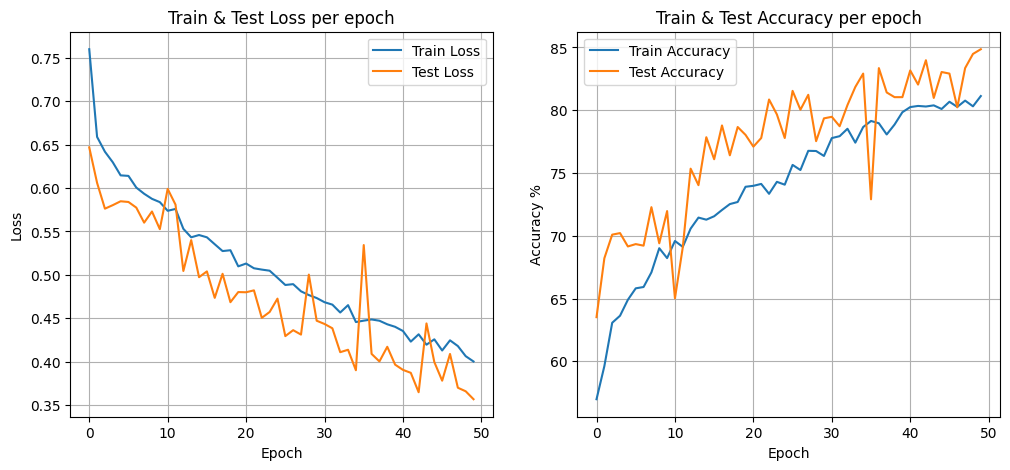

In [68]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()

In [69]:
from torch.utils.data import Subset

In [70]:
train_100_images = Subset(train_data_augmentation, range(100))
test_20_images = Subset(test_data_augmentation, range(20))

len(train_100_images), len(test_20_images)

(100, 20)